## Esercitazione 1 Aprile 2025

 # Implementare le function corde, secanti, Newton per il calcolo degli zeri di equazioni non lineari.

In [1]:
import sympy as sym
from sympy import symbols, Matrix, lambdify
import numpy as np
import matplotlib.pyplot as plt

## Esercizio 1 

 Confrontare tutti i metodi implementati (bisezione, falsa posizione, corde, secanti, Newton) nei casi seguenti:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3]  tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei casi 2-4.

Calcolare l'ordine di ciascun metodo.


In [8]:
def stima_ordine(xk, iterazioni):
      #Vedi dispensa allegata per la spiegazione

      k=iterazioni-4
      p=np.log(abs(xk[k+2]-xk[k+3])/abs(xk[k+1]-xk[k+2]))/np.log(abs(xk[k+1]-xk[k+2])/abs(xk[k]-xk[k+1]));
     
      ordine=p
      return ordine

In [9]:
import math
def sign(x):
  """
  Funzione segno che restituisce 1 se x è positivo, 0 se x è zero e -1 se x è negativo.
  """
  return math.copysign(1, x)

In [10]:
def metodo_bisezione(fname, a, b, tolx):
 """
 Implementa il metodo di bisezione per il calcolo degli zeri di un'equazione non lineare.

 Parametri:
  f: La funzione da cui si vuole calcolare lo zero.
  a: L'estremo sinistro dell'intervallo di ricerca.
  b: L'estremo destro dell'intervallo di ricerca.
  tol: La tolleranza di errore.

 Restituisce:
  Lo zero approssimato della funzione, il numero di iterazioni e la lista di valori intermedi.
 """
 fa=fname(a)
 fb=fname(b)
 if sign(fa)*sign(fb)>=0:
     print("Non è possibile applicare il metodo di bisezione \n")
     return None, None,None

 it = 0
 v_xk = []

 
 maxit = math.ceil(math.log2((b - a) / tolx))-1 #Numero massimo di iterazioni necessarie
                                                #per ridurre l'ampiezza dell'intervallo [a,b]
                                                # a dimensione tolx

 while abs(b - a) > tolx:
    xk = a+(b-a)/2
    v_xk.append(xk)
    it += 1
    fxk=fname(xk)
    if fxk==0:
      return xk, it, v_xk

    if sign(fa)*sign(fxk)>0:  #continua su [xk,b]
      a = xk
      fa=fxk
    elif sign(fxk)*sign(fb)>0:   #continua su [a,xk]
      b = xk
      fb=fxk

 
 return xk, it, v_xk


In [11]:
def falsa_posizione(fname,a,b,tolx,tolf,maxit):
    fa=fname(a)
    fb=fname(b)
    if sign(fa*fb)>=0:
       print("Metodo di bisezione non applicabile")
       return None,None,None

    it=0
    v_xk=[]
    fxk=100
    errore=100
    xprec=a
    while it<maxit and abs(fxk)>tolf and errore>tolx:
        xk=a-fa*(b-a)/(fb-fa)
        v_xk.append(xk)
        it+=1
        fxk=fname(xk)
        if fxk==0:
            return xk,it,v_xk

        if sign(fa*fxk)<0:#la radice si trova nell'intervallo [a,xk]
           b=xk
           fb=fxk
        elif sign(fxk*fb)<0: #la radice di trova nell'intervallo [xk,b]
           a=xk
           fa=fxk
        if xk!=0:
            errore=abs(xk-xprec)/abs(xk)
        else:
            errore=abs(xk-xprec)
        xprec=xk
    return xk,it,v_xk

In [12]:
def corde(fname,coeff_ang,x0,tolx,tolf,nmax):
    
     # m è il coefficiente angolare della retta che rimane fisso per tutte le iterazioni
        xk=[]
        
        it=0
        errorex=1+tolx
        erroref=1+tolf
        while it<nmax and  erroref>=tolf and errorex>=tolx :
           
           fx0=fname(x0)
           d=fx0/coeff_ang
           '''
           #x1= ascissa del punto di intersezione tra  la retta che passa per il punto
           (xi,f(xi)) e ha pendenza uguale a coeff_ang  e l'asse x
           '''
           x1=x0-d  
           fx1=fname(x1)
           if x1!=0:
                errorex=abs(d)/abs(x1)
           else:
                errorex=abs(d)
           
           erroref=np.abs(fx1)
           
           x0=x1
           it=it+1
           xk.append(x1)
          
        if it==nmax:
            print('Corde : raggiunto massimo numero di iterazioni \n')
            
        
        return x1,it,xk

In [13]:
def newton(fname,fpname,x0,tolx,tolf,nmax):
  
        xk=[]
       
        it=0
        errorex=1+tolx
        erroref=1+tolf
        while it<nmax and  erroref>=tolf and errorex>=tolx: #abs(d)>=tolx*abs(x1) :
           
           fx0=fname(x0)
           if abs(fpname(x0))<=np.spacing(1): #Se la derivata prima e' pià piccola della precisione di macchina stop
                print(" derivata prima nulla in x0")
                return None, None,None
           d=fx0/fpname(x0)
           '''
           #x1= ascissa del punto di intersezione tra  la retta che passa per il punto
           (xi,f(xi)) ed è tangente alla funzione f(x) nel punto (xi.f(xi))  e l'asse x
           '''
           x1=x0-d  
           fx1=fname(x1)
           erroref=np.abs(fx1)
           if x1!=0:
                errore=abs(d)/abs(x1)
           else:
                errore=abs(d) 

           it=it+1
           x0=x1
           xk.append(x1)
          
        if it==nmax:
            print('Newton: raggiunto massimo numero di iterazioni \n')
            
        
        return x1,it,xk

Ordine Bisezione  1.0
Ordine Falsa posizione  0.9874876271651606
Ordine Corde  0.9974037141480158
Ordine Newton  2.000741779917071
Ordine Secanti  1.6882134134560498


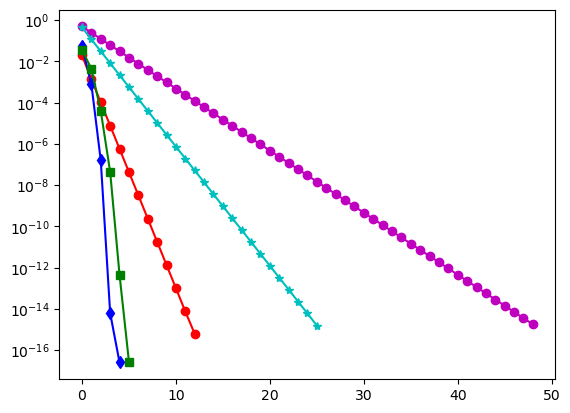

In [15]:
def secanti(fname,xm1,x0,tolx,tolf,nmax):
        xk=[]
        
        it=0
        errorex=1+tolx
        erroref=1+tolf
        while it<nmax and erroref>=tolf and errorex>=tolx:
            
            fxm1=fname(xm1)
            fx0=fname(x0) 
            d=fx0*(x0-xm1)/(fx0-fxm1)
            #x1 è l'intersezione con l'asse x della retta che passa per l'iterato precedente ed
            # ha coefficiente angolare della retta che passa per i due iterati precedenti
            
            x1=x0-d
          
            
            fx1=fname(x1)
            xk.append(x1);
            if x1!=0:
                errorex=abs(d)/abs(x1)
            else:
                errorex=abs(d)
            erroref=np.abs(fx1)
            xm1=x0
            x0=x1
            
            it=it+1;
           
       
        if it==nmax:
           print('Secanti: raggiunto massimo numero di iterazioni \n')
        
        return x1,it,xk


x=sym.symbols('x')
fs= sym.exp(-x)-(x+1)
dfs=sym.diff(fs, x,1)
titolo = 'exp(-x)-(x+1)'
fp = lambdify(x,dfs,np)
f=lambdify(x,fs,np)
alfa =0
a=-1
b=2
x0=0.5
xm1=-0.3
tolx=1e-14
tolf=1e-14
nmax=100
x1_b,it_b,xk_b=metodo_bisezione(f,a,b,tolx)
print("Ordine Bisezione ",stima_ordine(xk_b,it_b))
x1_f,it_f,xk_f=falsa_posizione(f,a,b,tolx,tolf,nmax)
print("Ordine Falsa posizione ",stima_ordine(xk_f,it_f))

coeff_ang=(f(b)-f(a))/(b-a)
x1_c,it_c,xk_c=corde(f,coeff_ang,x0,tolx,tolf,nmax)
print("Ordine Corde ",stima_ordine(xk_c,it_c))
x1n,it_n,xk_n=newton(f,fp,x0,tolx,tolf,nmax)
print("Ordine Newton ",stima_ordine(xk_n,it_n))
x1_s,it_s,xk_s=secanti(f,xm1,x0,tolx,tolf,nmax)
print("Ordine Secanti ",stima_ordine(xk_s,it_s))

xk_b=np.array(xk_b)
e_b=np.abs(xk_b-alfa)
xk_f=np.array(xk_f)
e_f=np.abs(xk_f-alfa)
xk_c=np.array(xk_c)
e_c=np.abs(xk_c-alfa)
xk_n=np.array(xk_n)
e_n=np.abs(xk_n-alfa)
xk_s=np.array(xk_s)
e_s=np.abs(xk_s-alfa)

plt.semilogy(range(it_b), e_b,'mo-', range(it_f),e_f, 'c*-', range(it_c),e_c,'ro-', range(it_n),e_n, 'db-', range(it_s),e_s,'gs-')

Calcolare gli zeri della funzione $f(x)=x^4-9x^2+4x+12$ definita sul'intervallo [-4,4] usando i metodi di Newton, corde e secandi, scegliendo opportunamente l'iterato iniziale per ogni metodo.

In [19]:
def newton_modificato(fname,fpname,m,x0,tolx,tolf,nmax):
  
        #m è la molteplicità dello zero
    
        xk=[]
       
        it=0
        errorex=1+tolx
        erroref=1+tolf
        while it<nmax and erroref>tolf and errorex > tolx:
           
           fx0=fname(x0)
           if fx0 == 0:
                print(" derivata prima nulla in x0")
                return None, None,None
           d=fx0/fpname(x0) 

           x1=x0-m*d
           fx1=fname(x1)
           erroref=np.abs(fx1)
           if x1!=0:
                errore=abs(x1-x0)/abs(x1)
           else:
                errore=abs(x1-x0)/abs(x1)

           it=it+1
           x0=x1
           xk.append(x1)
          
        if it==nmax:
            print('Newton modificato: raggiunto massimo numero di iterazioni \n')
            
        
        return x1,it,xk

# Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.

In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni effettuate, nit.


Implementare in altre due function `NewtonRaphson_Corde.py` e `NewtonRaphson_Sham.py` le varianti Corde e la variante di  Shamanskii


## Esercizio 1

Risolvere i seguenti cinque sistemi non lineari con tutti e tre i metodi e confrontare in scala logaritmica l'errore relativo tra due iterati successivi

    1) 
    2x0-cos(x1)=0

    sin(x0)+2x1=0

    2) 
    x0^2+x1^2-4=0

    x0^2-x1*2-1=0

    3) 
    x0^2+x1^2-2=0

    exp(x0-1)+x1^3-3
    
    4) 
    4x0^2+x_1^2^-4=0

    x0+x1-sin(x0-x1)=0

    5)

    x0+x1-3=0

    x0^2+x1^2-9=0
    
    
Per determinare l'iterato iniziale X 0 , servirsi del metodo grafico per individuare un 
iterato iniziale nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = fi (x1 ,x2 ) e z = h(x1 , x 2 ) e 
definire come iterato iniziale un vettore X 0 oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym


# Definizione variabili simboliche
x_sym, y_sym = symbols('x_sym y_sym')

# Definizione funzioni simboliche usando variabili simboliche 
       
f1_sym = lambda x_sym,y_sym: x_sym+y_sym-3   #[-1,1]
f2_sym= lambda x_sym,y_sym: x_sym**2+y_sym**2-9



def F_sym(f1_sym,f2_sym):
    return Matrix([[f1_sym(x_sym,y_sym)], [f2_sym(x_sym,y_sym)]])   

# Calcolo della matrice Jacobiana simbolicamente
J_sym = F_sym(f1_sym,f2_sym).jacobian(Matrix([x_sym, y_sym]))

# Converte la matrice jacobiana Simbolica in una funzione che può essere valutata numericamente mediante lambdify
J_numerical = lambdify([x_sym, y_sym], J_sym, np)

# Converte il vettore di funzioni Simbolico in una funzione che può essere valutata numericamente mediante lambdify
F_numerical = lambdify([x_sym, y_sym], F_sym(f1_sym,f2_sym), np)


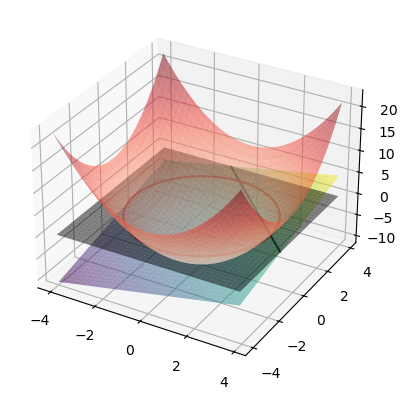

In [22]:

x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z=np.zeros_like(X)
superfici=F_numerical(X,Y).squeeze()
 
# Plotta la superficie direttamente
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plotta la superficie
ax.plot_surface(X, Y, superfici[0,:,:], cmap='viridis',alpha=0.5)
# Plotta la superficie
ax.plot_surface(X, Y, superfici[1,:,:], cmap='Reds',alpha=0.5)
ax.plot_surface(X, Y, Z, cmap='gray',alpha=0.5)
plt.contour(X, Y,superfici[0,:,:], levels=[0], colors='black')
plt.contour(X, Y,superfici[1,:,:], levels=[0], colors='red')
 
plt.show()


In [25]:
#Soluzione di sistemi di equazioni non lineari
def newton_raphson(initial_guess, F_numerical, J_Numerical, tolX, tolF, max_iterations):
    

    X= np.array(initial_guess, dtype=float)
    it=0
    
    erroreF=1+tolF
    erroreX=1+tolX
    
    errore=[]
    
    while erroreF>=tolF and erroreX >= tolX and it<max_iterations:
        
        jx = J_numerical(X[0],X[1])
        
        if np.linalg.det(jx)==0:
            print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
            return None, None,None
        
        fx = F_numerical(X[0],X[1])
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx, -fx)
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(s,1)/normaXnew
        else:
            erroreX=np.linalg.norm(s,1)
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0],Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    return X,it,errore

# Implementare il metodo di Newton Raphson per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

Calcolare il punto di minimo delle seguenti tre funzioni 
   $$\frac{1}{2}(0.001(x-1)^2+(x^2-y)^2)$$
   $$ (x - 2)^4 + (x - 2)^2 y^2+(y+1)^2$$
   $$x^4+(x+y)^2y^2+(exp(x)-1)^2$$
   $$100(y-x^2)^2+(1-x_sym)^2$$

In [ ]:
f1= lambda x: 0.5*(0.001(x-1)**2+(x**2.y)**2)

In [ ]:
f2= lambda x: (x-2)**4+(x-2)**2*y**2+(y+1)**2

In [ ]:
f3 = lambda x: x**4+(x+y)**2*y**2+(np.exp(x)-1)**2